In [8]:
#Model development

#A model or estimator can be thought of as a mathematical equation used to predict a
#value given one or more other values.

#Simple linear regression and multiple linear regression

#Linear Regression will refer to one independent variable to make a prediction.
#Multiple Linear Regression will refer to multiple independent variables to make a prediction.

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

url = '/content/imports-85.data'
df = pd.read_csv(url, header= None)
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

df["highway-mpg"] = pd.to_numeric(df["highway-mpg"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

mean = df["highway-mpg"].mean()
df = df.replace(np.nan, mean)
mean2 = df["price"].mean()
df = df.replace(np.nan, mean2)

In [9]:
lm = LinearRegression()

x = df[['highway-mpg']]
y = df['price']

lm.fit(x,y)

Yhat = lm.predict(x)

lm.intercept_

37757.83541593568

In [10]:
lm.coef_

array([-806.72592884])

In [14]:
df['curb-weight'].head()

0    2548
1    2548
2    2823
3    2337
4    2824
Name: curb-weight, dtype: int64

In [16]:
#Multiple linear Regression

df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["curb-weight"] = pd.to_numeric(df["curb-weight"], errors='coerce')
df["engine-size"] = pd.to_numeric(df["engine-size"], errors='coerce')

mean = df["horsepower"].mean()
df = df.replace(np.nan, mean)
mean2 = df["curb-weight"].mean()
df = df.replace(np.nan, mean2)
mean3 = df["engine-size"].mean()
df = df.replace(np.nan, mean3)

z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(z, df['price'])

Yhat = lm.predict(z)

In [17]:
lm.coef_

array([ -15.70866545,    2.97222261,  120.11384244, -204.93790457])

In [18]:
lm.intercept_

-1949.1912037385446

(0.0, 48164.034381600606)

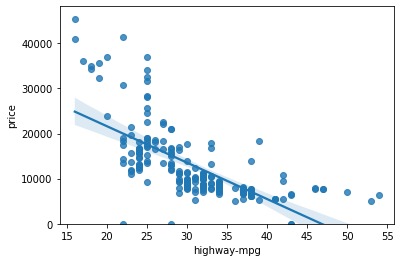

In [20]:
#Model evaluation using visualization

import seaborn as sns
from matplotlib import pyplot as plt

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


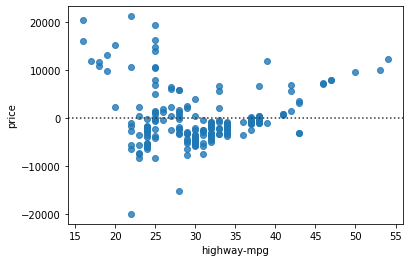

In [21]:
sns.residplot(df['highway-mpg'], df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


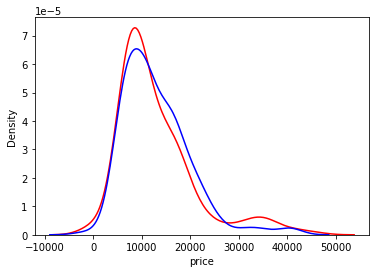

In [22]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [30]:
#Polynomial regression with more than one dimension

x1 = df['highway-mpg']

f = np.polyfit(x1,y,3)
p = np.poly1d(f)

print(p)

        3         2
-1.499 x + 196.9 x - 8641 x + 1.335e+05


In [37]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(df[['horsepower', 'highway-mpg']])

x_scale = SCALE.transform(df[['horsepower', 'highway-mpg']])

x_scale

array([[ 1.71064933e-01, -5.46058737e-01],
       [ 1.71064933e-01, -5.46058737e-01],
       [ 1.26180693e+00, -6.91627061e-01],
       [-5.72299045e-02, -1.09353765e-01],
       [ 2.72529305e-01, -1.27390036e+00],
       [ 1.45698840e-01, -8.37195385e-01],
       [ 1.45698840e-01, -8.37195385e-01],
       [ 1.45698840e-01, -8.37195385e-01],
       [ 9.06681632e-01, -1.56503700e+00],
       [ 1.41400349e+00, -1.27390036e+00],
       [-8.25959976e-02, -2.54922089e-01],
       [-8.25959976e-02, -2.54922089e-01],
       [ 4.24725864e-01, -4.00490413e-01],
       [ 4.24725864e-01, -4.00490413e-01],
       [ 4.24725864e-01, -8.37195385e-01],
       [ 1.97205754e+00, -1.27390036e+00],
       [ 1.97205754e+00, -1.27390036e+00],
       [ 1.97205754e+00, -1.56503700e+00],
       [-1.42699893e+00,  3.23871768e+00],
       [-8.68944883e-01,  1.78303445e+00],
       [-8.68944883e-01,  1.78303445e+00],
       [-9.19677069e-01,  1.49189780e+00],
       [-9.19677069e-01,  1.05519283e+00],
       [-5.

In [38]:
#Pipeline constructor
from sklearn.preprocessing import PolynomialFeatures

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures()),
 ('model', LinearRegression())]

In [44]:
#Measures for in sample evaluation

from sklearn.metrics import mean_squared_error
lm.fit(x,y)
Yhat = lm.predict(x)
mean_squared_error(df['price'], Yhat)

34224304.54573701

In [46]:
#R-squared/R2
x = df[['highway-mpg']]
y = df['price']
lm.score(x,y)

0.4729616081984709

In [59]:
#Prediction and decision making
arr = [[30], [0]]
lm.predict(arr)

array([13556.05755082, 37757.83541594])

In [60]:
lm.coef_

array([-806.72592884])

In [62]:
import numpy as np

new_input = np.arange(1,101,1).reshape(-1,1)

In [63]:
yhat = lm.predict(new_input)

In [64]:
yhat

array([ 36951.1094871 ,  36144.38355826,  35337.65762942,  34530.93170059,
        33724.20577175,  32917.47984291,  32110.75391408,  31304.02798524,
        30497.3020564 ,  29690.57612757,  28883.85019873,  28077.12426989,
        27270.39834105,  26463.67241222,  25656.94648338,  24850.22055454,
        24043.49462571,  23236.76869687,  22430.04276803,  21623.31683919,
        20816.59091036,  20009.86498152,  19203.13905268,  18396.41312385,
        17589.68719501,  16782.96126617,  15976.23533734,  15169.5094085 ,
        14362.78347966,  13556.05755082,  12749.33162199,  11942.60569315,
        11135.87976431,  10329.15383548,   9522.42790664,   8715.7019778 ,
         7908.97604896,   7102.25012013,   6295.52419129,   5488.79826245,
         4682.07233362,   3875.34640478,   3068.62047594,   2261.89454711,
         1455.16861827,    648.44268943,   -158.28323941,   -965.00916824,
        -1771.73509708,  -2578.46102592,  -3385.18695475,  -4191.91288359,
        -4998.63881243,  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


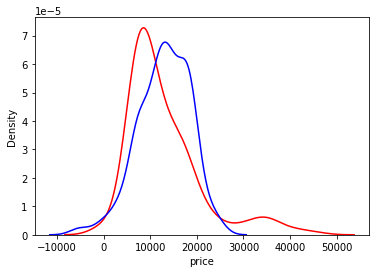

In [65]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)